# Create dataset containing images for Cat Machine Learning

The Cat Machine Learning exercise uses data from the <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a> image dataset.

This notebook requires two parameters &ndash; the directory where the unpacked CIFAR-10 dataset is stored and how many images should be loaded. It will then load the required number of images (X) from the dataset &ndash; X / 2 images of cats and X / 2 other images &ndash; and store these images in a CSV file 'Cats.csv' .

In [1]:
cifar_directory = 'cifar-10-batches-py'
n_images = 500

## Load data

In [2]:
%matplotlib inline

import os
import csv
import json
import math
import pickle
import numpy as np
from sklearn import utils

In [3]:
def unpickle(file):
    with open(file, 'rb') as fp:
        data = pickle.load(fp, encoding='bytes')
    return data

In [4]:
batch_meta = unpickle(os.path.join(cifar_directory, 'batches.meta'))
batches = []
for fname in os.listdir(cifar_directory):
    if fname.startswith('data_batch_'):
        batches.append(unpickle(os.path.join(cifar_directory, 'data_batch_1')))
print('Loaded {} batches'.format(len(batches)))

Loaded 5 batches


## Create dataset

In [5]:
data = []
labels = []
img_per_class = math.ceil(n_images / 2)
for b_id in range(len(batches)):
    for img_id in range(len(batches[b_id][b'data'])):
        if batch_meta[b'label_names'][batches[b_id][b'labels'][img_id]] == b'cat' and sum(labels) < img_per_class:
            data.append(batches[b_id][b'data'][img_id])
            labels.append(1)
        elif len(data) < n_images and (len(labels) - sum(labels)) < img_per_class:
            data.append(batches[b_id][b'data'][img_id])
            labels.append(0)
            
data = np.array(data)
print('Data matrix shape:', data.shape)
labels = np.array(['cat' if l else 'not cat' for l in labels])
print('Labels vector shape:', labels.shape)

from collections import Counter
print('Label counts:', Counter(labels).most_common())

Data matrix shape: (500, 3072)
Labels vector shape: (500,)
Label counts: [('not cat', 250), ('cat', 250)]


## Visualize a few images

label:  cat


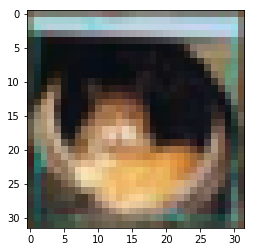

label:  not cat


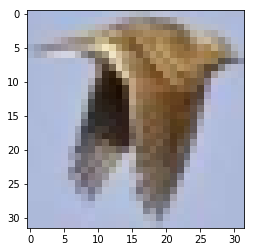

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(data, labels, im_idx=0):
    im = data[im_idx, :]

    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))

    print("label: ", labels[im_idx])       

    plt.imshow(img) 
    plt.show()
    
plot_image(data, labels, 321)
plot_image(data, labels, 123)

## Store data in a CSV file

In [7]:
with open('Cats.csv', 'w') as fp:
    data, labels = utils.shuffle(data, labels)
    writer = csv.writer(fp)
    for img_id in range(len(data)):
        writer.writerow([labels[img_id], json.dumps(data[img_id].tolist())])